# Gráficas

## Primitivas gráficas

Podemos combinar en un gráfico imágenes, puntos, polilíneas, etc.

In [1]:
%matplotlib inline

import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt
import skimage.io        as io

(600, 800, 3)


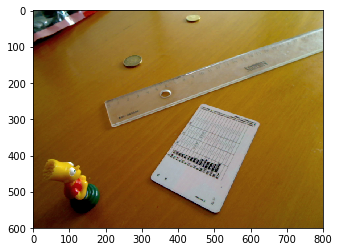

In [2]:
img = io.imread('../images/coins.png')

print(img.shape)
plt.imshow(img)

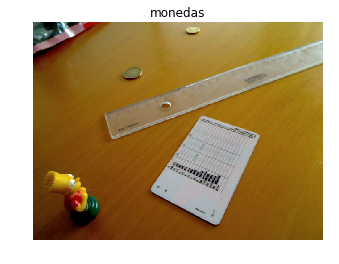

In [3]:
plt.imshow(img)
plt.title('monedas'); plt.axis('off');

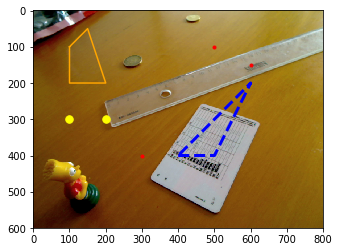

In [4]:
plt.imshow(img);

# dibujamos polígonos y puntos
plt.plot([100,100,200,150,100]
        ,[100,200,200, 50,100],color='orange');

plt.plot([500,600,300]
        ,[100,150,400],'.',color='red')

plt.plot([100,200],[300,300],'.',color='yellow',markerSize=15);
plt.plot([400,500,600,400],[400,400,200,400],'-',color='blue',lw=3,ls='dashed');

(-0.5, 799.5, 599.5, -0.5)


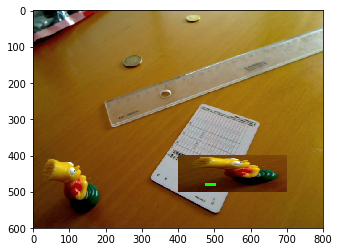

In [5]:
# muestramos la imagen completa
plt.imshow(img);

# guardamos los límites para luego
ax = plt.axis()
print(ax)

# extraemos un rectángulo del array de imagen
reg = img[400:,:200]

# lo modificamos
reg[150:170 , 50:70 , :] = 0,255,0

# y lo situamos en la figura en la zona deseada
plt.imshow(reg, extent=[400,700,500,400])

# recuperamos los límites de la figura,
# porque el último imshow los cambia.
plt.axis(ax);

# podemos elegir los límites como deseemos
# plt.axis([0,1000,0,1000]);

El trozo de imagen extraído es una referencia y sus modificaciones se producen realmente en la imagen original:

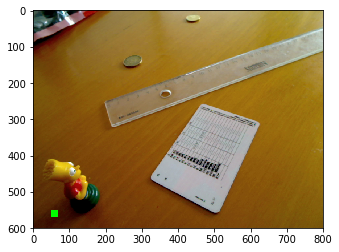

In [6]:
plt.imshow(img);

Para evitarlo podemos hacer `reg = img[400:,:200].copy()`.

## Guardar imágenes

Con `plt.savefig` podemos guardar la gráfica completa, y con `io.imsave` guardamos un array de imagen.

In [7]:
# plt.savefig('result.pdf')  # o .svg, .png, .jpg, etc.
# io.imsave('result.png', img)

## OpenCV

Matplotlib es apropiado para crear figuras de gran calidad en libros, artículos, etc. Pero para visualizar información en vivo es más eficiente usar las primitivas gráficas de opencv. Estas funciones modifican destructivamente un array de imagen, por lo que hay que manejarlas con cuidado.

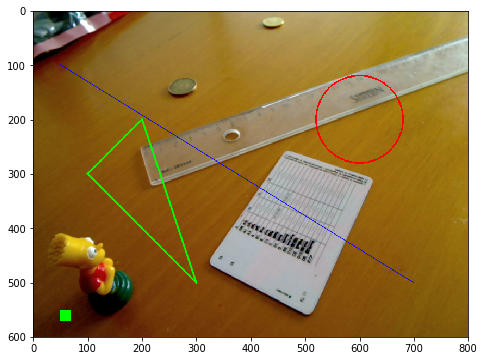

In [8]:
cv.circle(img,(600,200),80,(255,0,0),2)
cv.line(img,(50,100),(700,500),(0,0,255),1,cv.LINE_AA)

poly = np.array([[100,300],
                 [200,200],
                 [300,500]])
cv.polylines(img, [ poly ], isClosed= True, color=(0,255,0), thickness= 2, lineType=cv.LINE_AA )

plt.figure(figsize=(8,6))
plt.imshow(img);

Es importante recordar que opencv lee y escribe imágenes en orden BGR, mientras que matplotlib y skimage usan RGB.

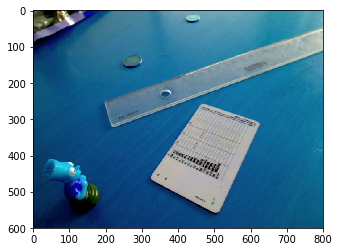

In [9]:
img = cv.imread('../images/coins.png')
plt.imshow(img);

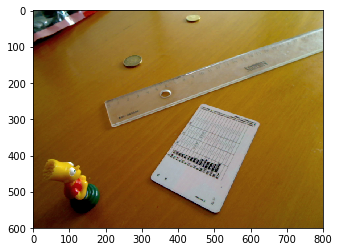

In [10]:
imgrgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(imgrgb);

## Conversión a monocromo y colormap

In [11]:
g = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
g.shape

(600, 800)

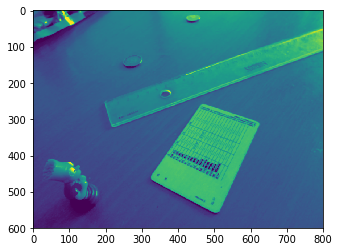

In [12]:
plt.imshow(g);

Las imágenes monocromas (un solo canal), se muestran con un mapa de color que por omisión no es muy bonito. Podemos cambiarlo.

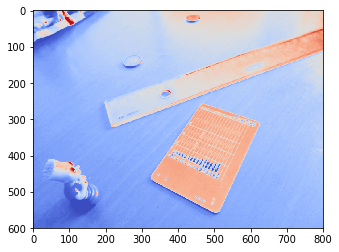

In [13]:
plt.imshow(g,'coolwarm');

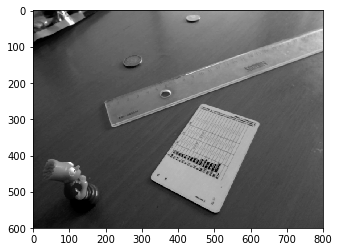

In [14]:
plt.imshow(g,'gray');

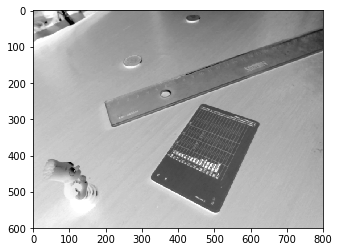

In [15]:
plt.imshow(255-g,'gray');

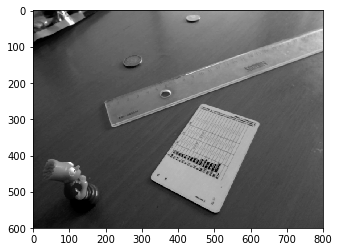

In [16]:
plt.set_cmap('gray'); # fijamos el colormap

plt.imshow(g);

## Imagen como superficie

In [17]:
np.meshgrid(np.arange(5),np.arange(4))

[array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]), array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]])]

In [18]:
np.mgrid[0:4 , 0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

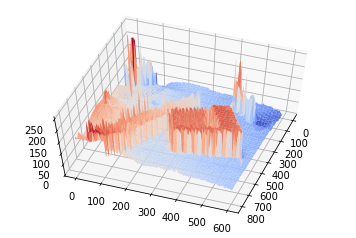

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r,c = g.shape
x,y = np.meshgrid(np.arange(c), np.arange(r))

# la coordenada z del gráfico 3D es el nivel de gris de la imagen anterior.
z = g

ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0);
ax.view_init(60, 20)

Con el mapa de color `cmap='gray'` y mirando desde arriba se ve la imagen original. 

Rearrancando con `%matplotlib notebook` las gráficas se pueden modificar interactivamente dentro del notebook, aunque no va muy ágil. Con `%matplotlib qt` o `%matplotlib tk` salen en una ventana aparte igual que, en las aplicaciones normales de escritorio.

## Vector field

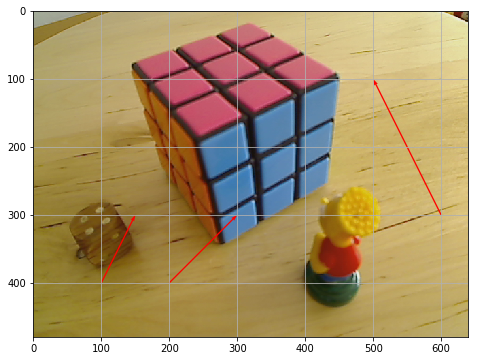

In [20]:
# ejemplo de quiver

img = io.imread('../images/cube3.png')

x1 = np.array([100,200,600])
y1 = np.array([400,400,300])

x2 = np.array([50,100,-100])
y2 = np.array([100,100,200])

plt.figure(figsize=(9,6))
plt.imshow(img)
plt.quiver(x1, y1, x2, y2, color='Red',
           width=0.003, scale=1, scale_units='xy');
plt.grid()

## OpenGL

Para crear efectos 3D lo ideal es utilizar bibliotecas gráficas optimizadas.

El ejemplo de código [`surface.py`](../code/surface.py) muestra en vivo la superficie de niveles de gris anterior con la secuencia de imágenes de la webcam.  En la ventana gráfica podemos hacer zoom y cambiar el punto de vista.